The datasets consist of several medical predictor (independent) variables and one target
(dependent) variable, Outcome.
1 analyze data and detect anomaly
2 create classifier using KNN algorithm
3 find best K
4 view confusion matrix for predicted data and think about results

In [1]:
# Importing modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [2]:
# Importing the dataset
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Getting feature and label variables
X = diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = diabetes_df['Outcome']

In [5]:
# Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
342,1,0,68,35,0,32.0,0.389,22
699,4,118,70,0,0,44.5,0.904,26
118,4,97,60,23,0,28.2,0.443,22
129,0,105,84,0,0,27.9,0.741,62
272,3,122,78,0,0,23.0,0.254,40
...,...,...,...,...,...,...,...,...
347,3,116,0,0,0,23.5,0.187,23
610,3,106,54,21,158,30.9,0.292,24
444,4,117,62,12,0,29.7,0.380,30
163,2,100,64,23,0,29.7,0.368,21


In [57]:
# Creating the model
# If we are prioritizing to minimize false negatives on test data, 
# than 1 seems to be the best value for k(n_neighbors)
dia = KNeighborsClassifier(n_neighbors=1)
dia.fit(x_train, y_train)
dia.predict(x_test)


array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

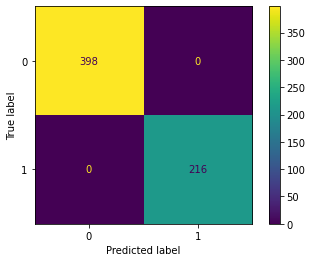

In [58]:
# Creating confusion matrix for training data
ConfusionMatrixDisplay.from_predictions(y_train, dia.predict(x_train))
plt.show()

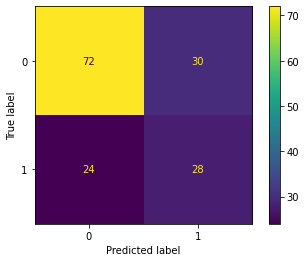

In [59]:
# Confusion matrix for test data
ConfusionMatrixDisplay.from_predictions(y_test, dia.predict(x_test))
plt.show()